In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
from IPython.display import display, FileLink
from scipy.stats import skew
import os

In [ ]:
gapminder = pd.read_csv('gapminder_data_graphs.csv', delimiter=',',decimal='.',header=0).iloc[:, 1:]
gapminder.head()

,continent,year,life_exp,hdi_index,co2_consump,gdp,services
0,Asia,1998,53.3,0.344,0.0522,NaN,24.4
1,Asia,1999,54.7,0.348,0.0402,NaN,24.6
2,Asia,2000,54.7,0.350,0.0370,NaN,24.7
3,Asia,2001,54.8,0.353,0.0376,NaN,24.7
4,Asia,2002,55.5,0.384,0.0471,333.0,25.6


In [ ]:
gapminder.duplicated().sum()

0

In [ ]:
df = gapminder.dropna(subset=gapminder.select_dtypes(include=['number']).columns)
df

,continent,year,life_exp,hdi_index,co2_consump,gdp,services
4,Asia,2002,55.5,0.384,0.0471,333.0,25.6
5,Asia,2003,56.5,0.393,0.0509,346.0,25.9
6,Asia,2004,57.1,0.409,0.0368,336.0,26.1
7,Asia,2005,57.6,0.418,0.0515,360.0,26.5
8,Asia,2006,58.0,0.429,0.0622,368.0,26.9
...,...,...,...,...,...,...,...
3670,Africa,2014,58.0,0.547,0.8810,1440.0,25.4
3671,Africa,2015,58.6,0.553,0.8810,1450.0,25.7
3672,Africa,2016,59.2,0.558,0.7710,1430.0,26.1
3673,Africa,2017,59.9,0.563,0.8450,1480.0,26.6


In [ ]:
N = len(df)
D = len(df) - 1
L = df['continent'].nunique()

print("Number of observations (N):", N)
print("Number of predictors (D):", D)
print("Number de classes (L):", L)
print()
print(df.describe())

Number of observations (N): 3532
Number of predictors (D): 3531
Number de classes (L): 6

              year     life_exp    hdi_index  co2_consump            gdp  \
count  3532.000000  3532.000000  3532.000000  3532.000000    3532.000000   
mean   2008.269536    70.088930     0.676819     4.782874   12200.637033   
std       5.972357     8.866085     0.163818     6.533406   17270.189477   
min    1998.000000    32.500000     0.255000     0.015900     238.000000   
25%    2003.000000    64.400000     0.542750     0.605750    1490.000000   
50%    2008.000000    72.100000     0.700500     2.300000    4365.000000   
75%    2013.000000    76.700000     0.805000     6.730000   14300.000000   
max    2018.000000    84.800000     0.956000    67.100000  105000.000000   

          services  
count  3532.000000  
mean     51.673412  
std      18.217228  
min       5.590000  
25%      38.200000  
50%      53.500000  
75%      66.000000  
max      88.500000  


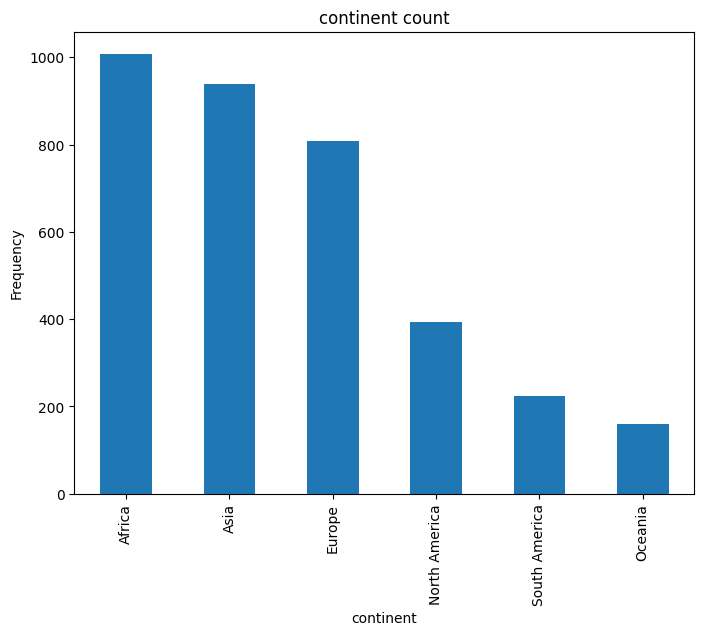

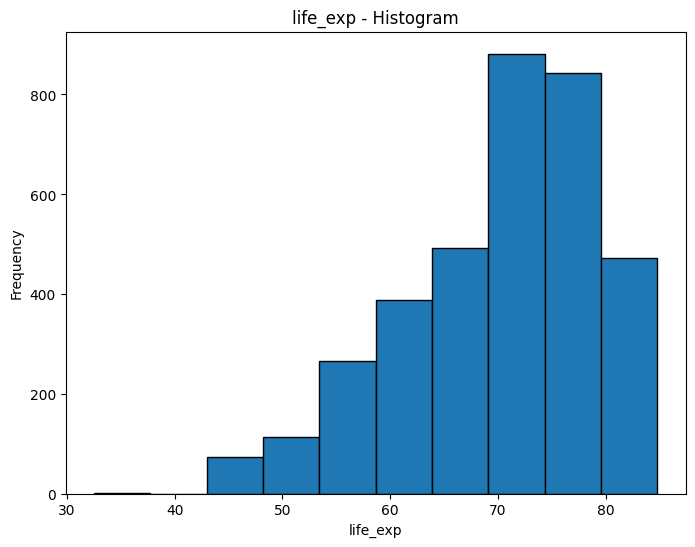

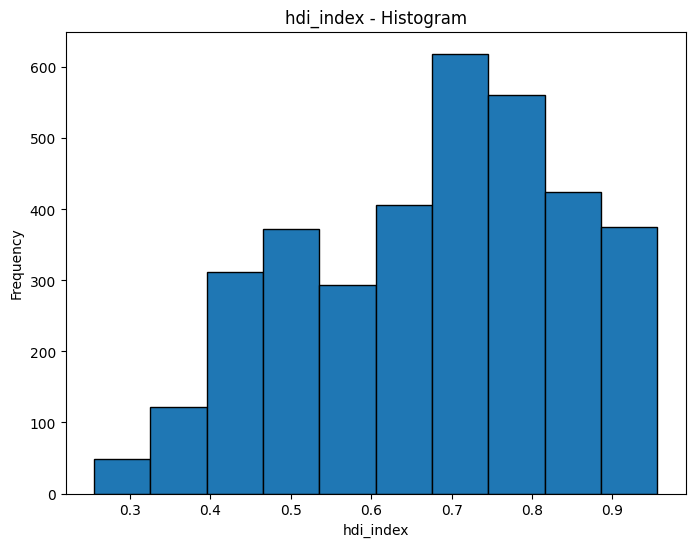

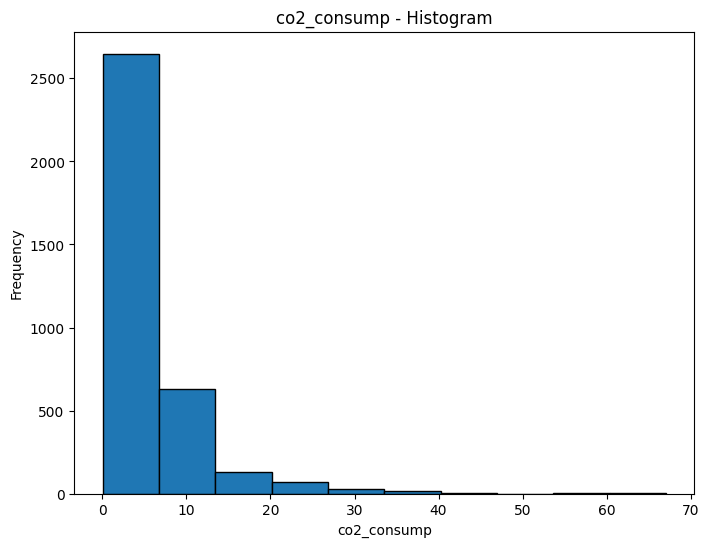

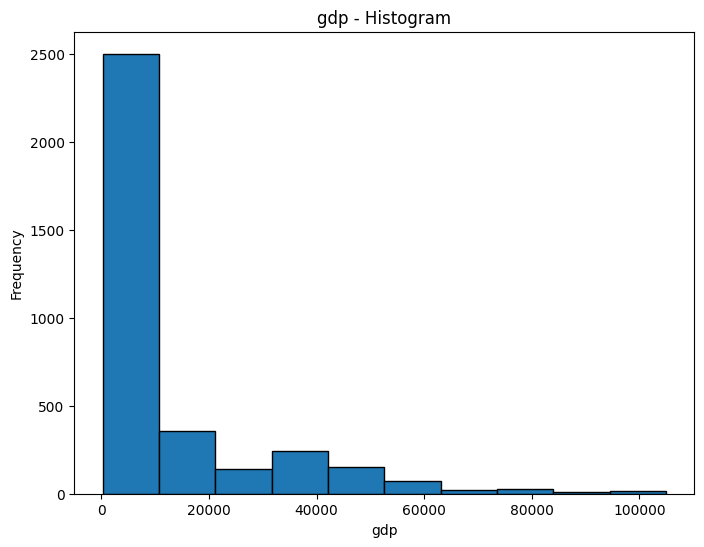

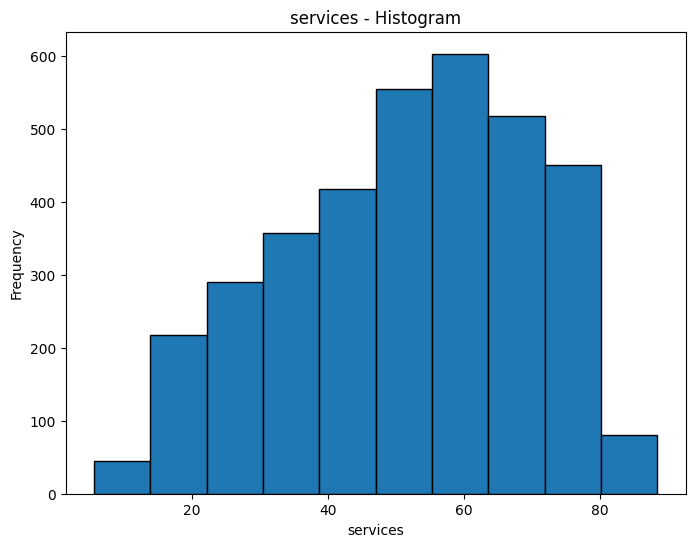

<Figure size 800x600 with 0 Axes>

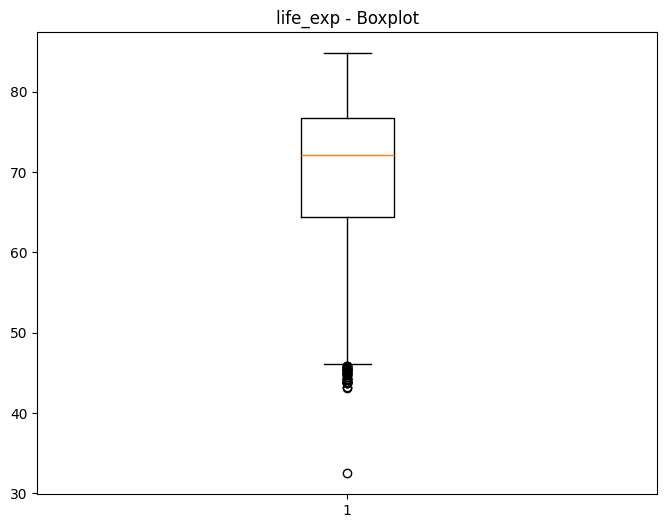

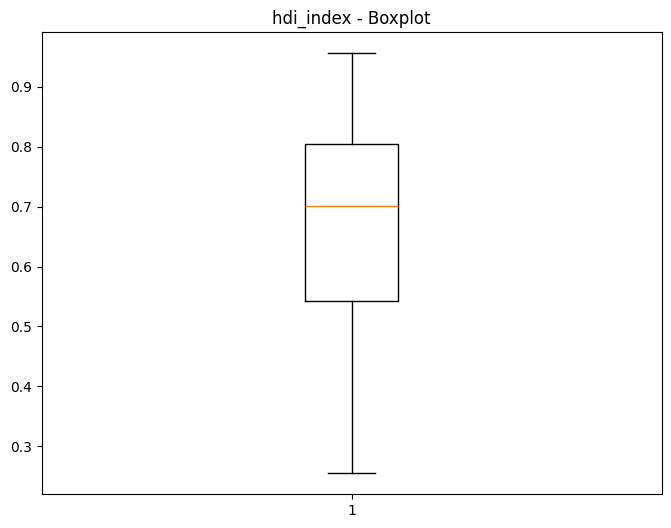

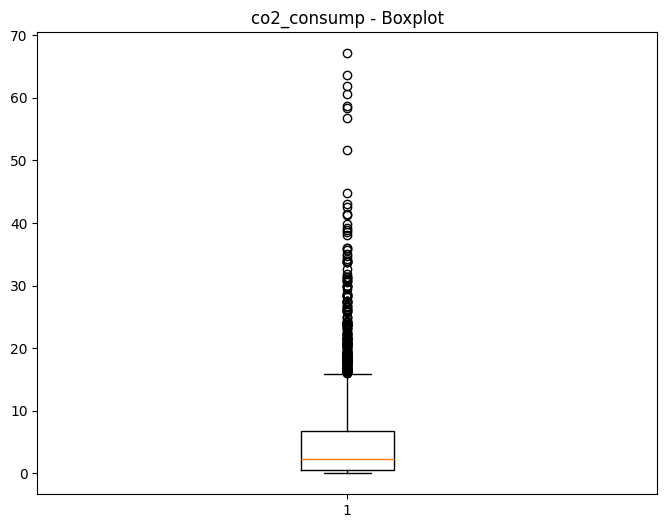

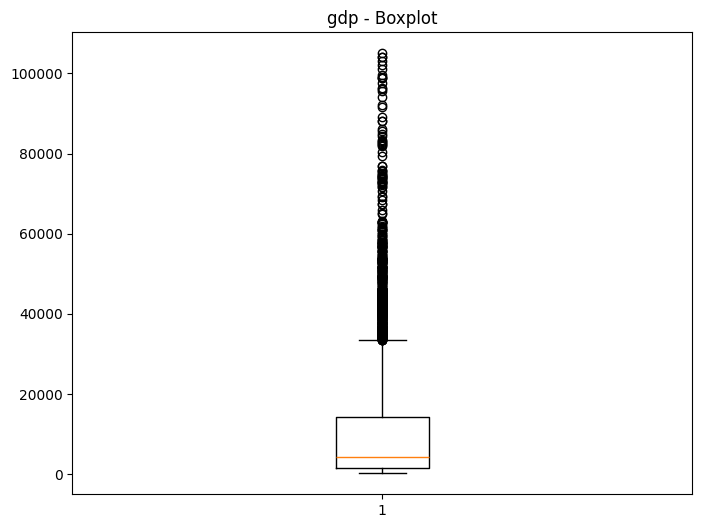

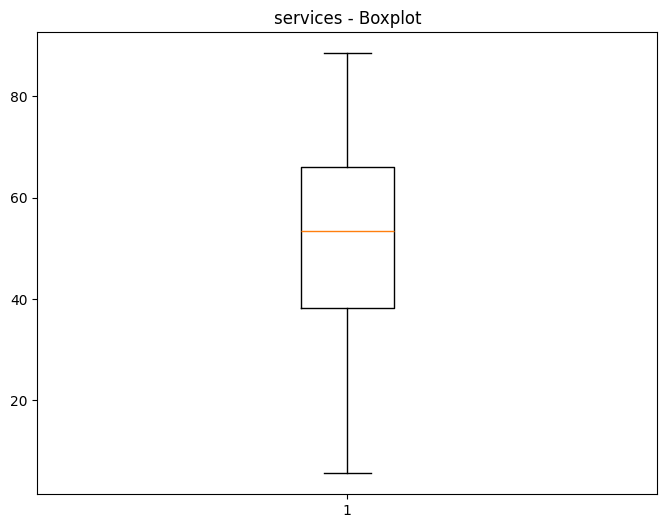

In [ ]:
columns = ['continent','life_exp', 'hdi_index', 'co2_consump', 'gdp', 'services']

def plot_univariate_hist(df):
    for column in columns:
        plt.figure(figsize=(8, 6))
        if df[column].dtype in ['int64', 'float64']:
            plt.hist(df[column], edgecolor='black')
            plt.title(f'{column} - Histogram')
            plt.xlabel(column)
            plt.ylabel('Frequency')
        else:
            df[column].value_counts().plot(kind='bar')
            plt.title(f'{column} count')
            plt.xlabel(column)
            plt.ylabel('Frequency')
        plt.show()
plot_univariate_hist(df)

def plot_univariate_boxplot(df):
    for column in columns:
        plt.figure(figsize=(8, 6))
        if df[column].dtype in ['int64', 'float64']:
            plt.boxplot(df[column])
            plt.title(f'{column} - Boxplot')
plot_univariate_boxplot(df)

In [ ]:
os.makedirs("plots", exist_ok=True)
stats_univariate = pd.DataFrame(columns=["Predictor", "Mean (μd)", "Std Dev (σd)", "Skewness (γd)"])
stats_by_class = pd.DataFrame(columns=["Predictor", "Class", "Mean (μd)", "Std Dev (σd)", "Skewness (γd)"])

columns = ['life_exp', 'hdi_index', 'co2_consump', 'gdp', 'services']

for column in columns:
    mean = df[column].mean()
    std_dev = df[column].std()
    skewness = skew(df[column], nan_policy='omit')

    stats_univariate = pd.concat([stats_univariate, pd.DataFrame({
        "Predictor": [column],
        "Mean (μd)": [mean],
        "Std Dev (σd)": [std_dev],
        "Skewness (γd)": [skewness]
    })], ignore_index=True)

    for continent in df['continent'].unique():
        subset = df[df['continent'] == continent][column]

        mean_class = subset.mean()
        std_dev_class = subset.std()
        skewness_class = skew(subset, nan_policy='omit')

        stats_by_class = pd.concat([stats_by_class, pd.DataFrame({
            "Predictor": [column],
            "Class": [continent],
            "Mean (μd)": [mean_class],
            "Std Dev (σd)": [std_dev_class],
            "Skewness (γd)": [skewness_class]
        })], ignore_index=True)

display(stats_by_class.style.set_caption("Analysis by Class (Continents)"))

<ipython-input-12-5257522620bf>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_univariate = pd.concat([stats_univariate, pd.DataFrame({
<ipython-input-12-5257522620bf>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_by_class = pd.concat([stats_by_class, pd.DataFrame({


,Predictor,Class,Mean (μd),Std Dev (σd),Skewness (γd)
0,life_exp,Asia,71.896699,5.823760,-0.007101
1,life_exp,Europe,77.099380,4.190446,-0.560446
2,life_exp,Africa,60.397024,7.763255,0.085831
3,life_exp,South America,74.132444,4.011631,-0.964333
4,life_exp,Oceania,69.678750,7.887036,0.215597
5,life_exp,North America,74.084733,5.054804,-2.419710
6,hdi_index,Asia,0.695958,0.126313,-0.257395
7,hdi_index,Europe,0.837753,0.071220,-0.502672
8,hdi_index,Africa,0.500728,0.114754,0.474321
9,hdi_index,South America,0.723818,0.059792,0.219138


In [ ]:
os.makedirs("plots", exist_ok=True)
data = df
predictor_columns = ['life_exp', 'hdi_index', 'co2_consump', 'gdp', 'services']
predictor_options = ['All'] + predictor_columns

continents = list(data['continent'].unique())
continent_options = ['All'] + continents

predictor_selector = widgets.Dropdown(
    options=predictor_options,
    description='Predictor:',
    continuous_update=False
)

continent_selector = widgets.Dropdown(
    options=continent_options,
    description='Continent:',
    continuous_update=False
)

def plot_analysis(predictor, continent):
    if predictor == 'All' and continent == 'All':
        print("Showing univariate analysis for ALL predictors (entire dataset):")
        for col in predictor_columns:
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))

            sns.histplot(data[col], kde=True, ax=axes[0], color='yellow')
            axes[0].set_title(f"{col} - (All Continents) Histogram")
            axes[0].set_xlabel(col)
            axes[0].set_ylabel("Frequency")

            sns.boxplot(x=data[col], ax=axes[1], color='blue')
            axes[1].set_title(f"{col} - (All Continents) Boxplot")

            plt.tight_layout()

            filename = f"plots/All_All_{col}.png"
            plt.savefig(filename)
            plt.show()
            display(FileLink(filename))

    elif continent == 'All':
        print(f"Showing class-conditional analysis for predictor: {predictor} (across all continents):")
        predictors_to_plot = predictor_columns if predictor == 'All' else [predictor]

        for col in predictors_to_plot:
            fig, axes = plt.subplots(len(continents), 2, figsize=(12, 5 * len(continents)))
            if len(continents) == 1:
                axes = axes.reshape(1, -1)

            for i, cont in enumerate(continents):
                subset = data[data['continent'] == cont]

                sns.histplot(subset[col], kde=True, ax=axes[i, 0], color='yellow')
                axes[i, 0].set_title(f"{col} - ({cont}) Histogram")
                axes[i, 0].set_xlabel(col)
                axes[i, 0].set_ylabel("Frequency")

                sns.boxplot(x=subset[col], ax=axes[i, 1], color='blue')
                axes[i, 1].set_title(f"{col} - ({cont}) Boxplot")

            plt.tight_layout()

            filename = f"plots/All_{col}.png"
            plt.savefig(filename)
            plt.show()
            display(FileLink(filename))

    else:
        print(f"Showing univariate analysis for predictor: {predictor} in continent: {continent}:")
        data_subset = data[data['continent'] == continent]
        predictors_to_plot = predictor_columns if predictor == 'All' else [predictor]

        for col in predictors_to_plot:
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))

            sns.histplot(data_subset[col], kde=True, ax=axes[0], color='yellow')
            axes[0].set_title(f"{col} - ({continent}) Histogram")
            axes[0].set_xlabel(col)
            axes[0].set_ylabel("Frequency")

            sns.boxplot(x=data_subset[col], ax=axes[1], color='blue')
            axes[1].set_title(f"{col} - ({continent}) Boxplot")

            plt.tight_layout()

            filename = f"plots/{continent}_{col}.png"
            plt.savefig(filename)
            plt.show()
            display(FileLink(filename))

widgets.interact(plot_analysis, predictor=predictor_selector, continent=continent_selector)

interactive(children=(Dropdown(description='Predictor:', options=('All', 'life_exp', 'hdi_index', 'co2_consump…

<function __main__.plot_analysis(predictor, continent)>

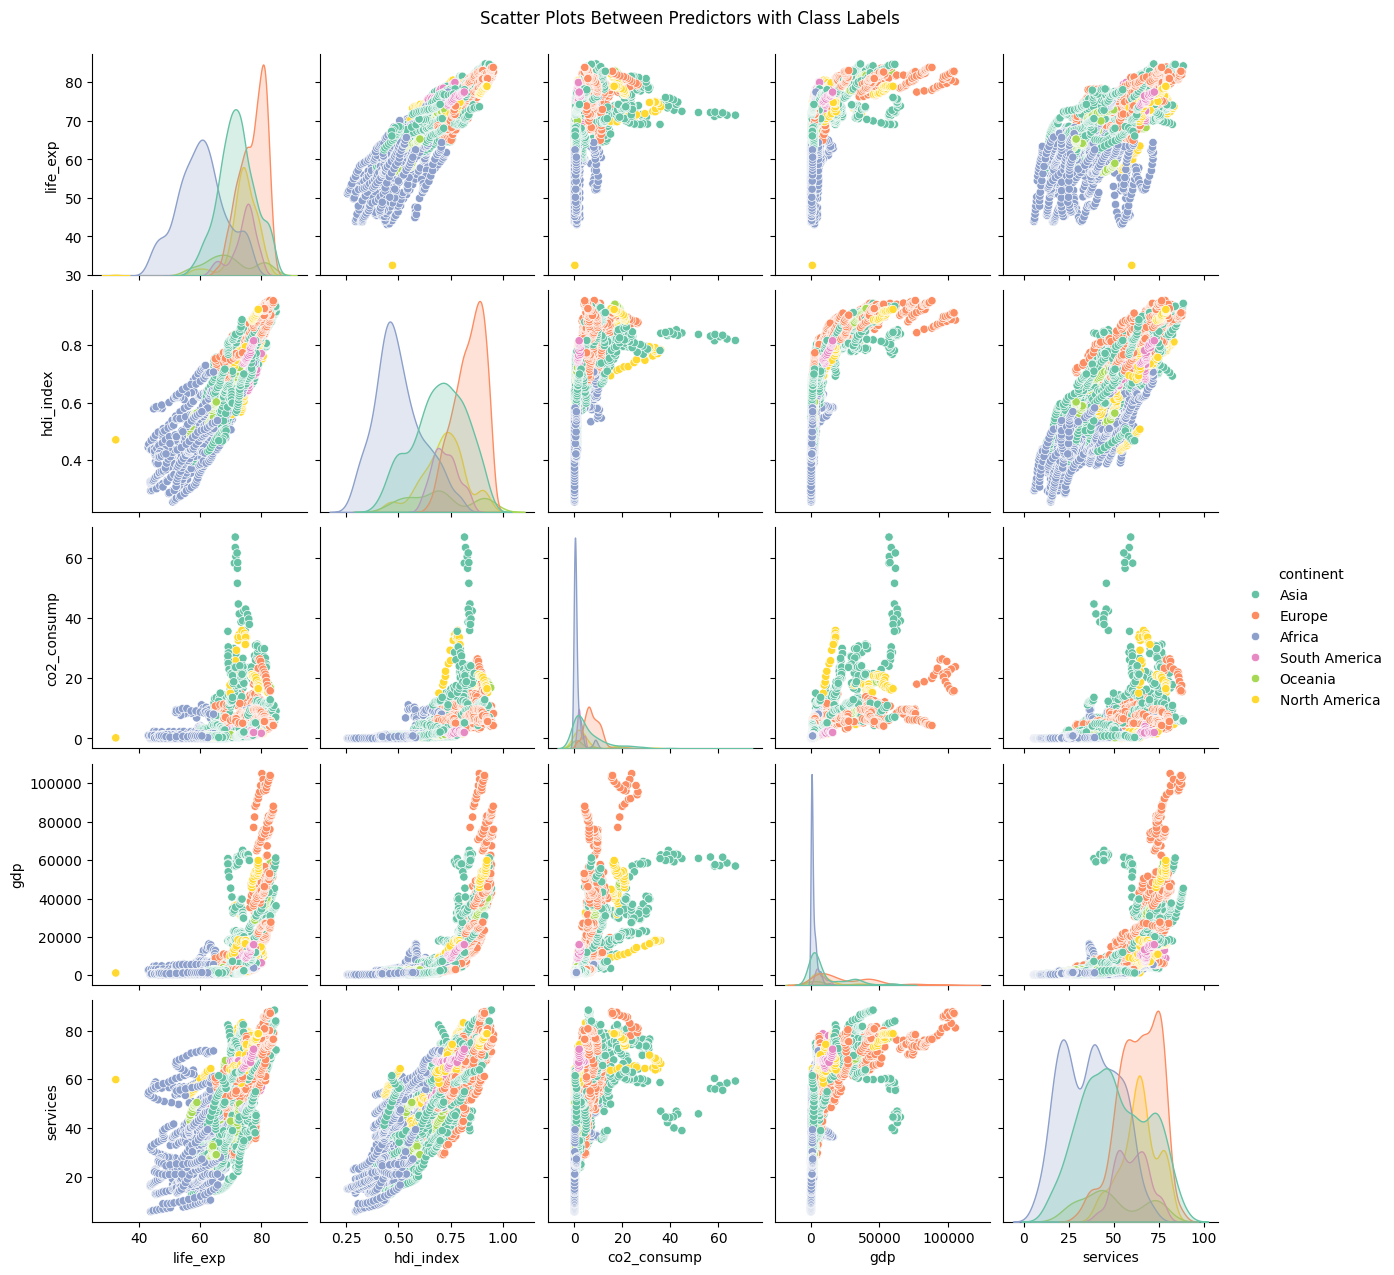

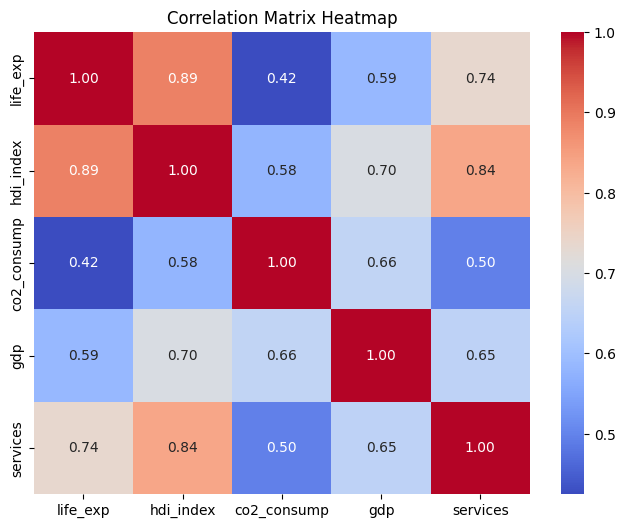

In [ ]:
sns.pairplot(
    data = df,
    vars=['life_exp', 'hdi_index', 'co2_consump', 'gdp', 'services'],
    hue="continent",
    palette="Set2",
    diag_kind="kde"
)
plt.suptitle("Scatter Plots Between Predictors with Class Labels", y=1.02)
plt.show()

predictor_columns = ['life_exp', 'hdi_index', 'co2_consump', 'gdp', 'services']
correlation_matrix = df[predictor_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar=True
)
plt.title("Correlation Matrix Heatmap")
plt.show()